In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.animation as animation
import datetime
import seaborn as sns
import missingno as msno
import firebase_admin
from firebase_admin import credentials, db
from datetime import datetime  # Untuk konversi timestamp ke human-readable
sns.set_theme(style="whitegrid")
%matplotlib inline 

In [2]:
# Konfigurasi database sumber
source_cred = credentials.Certificate("/work/staklimjerukagung-firebase-admin.json")
firebase_admin.initialize_app(source_cred, {
    'databaseURL': 'https://staklimjerukagung-default-rtdb.asia-southeast1.firebasedatabase.app/'
})

In [3]:
# Input readable date
start_readable_date = "01-01-2025 00:00:00"  # Format: DD-MM-YYYY HH:MM:SS
end_readable_date = "30-05-2025 23:59:59"  # Format: DD-MM-YYYY HH:MM:SS

# Convert readable date to Unix timestamp
start_timestamp = int(datetime.strptime(start_readable_date, "%d-%m-%Y %H:%M:%S").timestamp())
print(start_timestamp) # Convert to string and print
end_timestamp = int(datetime.strptime(end_readable_date, "%d-%m-%Y %H:%M:%S").timestamp())
print(end_timestamp) # Convert to string and print


1735689600
1748649599


In [4]:
# Refer ke path data
ref_data1 = db.reference('/auto_weather_stat/id-03/data')
ref_data2 = db.reference('/auto_weather_stat/id-05/data')

# Ambil data yang key-nya berada dalam rentang waktu yang ditentukan
query_data1 = ref_data1.order_by_key().start_at(str(start_timestamp)).end_at(str(end_timestamp))
query_data2 = ref_data2.order_by_key().start_at(str(start_timestamp)).end_at(str(end_timestamp))

# Ambil hasil
results_data1 = query_data1.get()
results_data2 = query_data2.get()

In [5]:
# Mengubah data menjadi DataFrame pandas untuk data pertama
if results_data1:
    cuaca1 = pd.DataFrame.from_dict(results_data1, orient='index')
    
    # Jika 'timestamp' sudah ada, jangan pindahkan indeks ke kolom
    if 'timestamp' not in cuaca1.columns:
        cuaca1.index.name = 'timestamp'  # Mengatur nama indeks
        cuaca1.reset_index(inplace=True)  # Memindahkan indeks menjadi kolom biasa
    
    print("Data dari sumber pertama:")
    print(cuaca1.head())  # Menampilkan data untuk verifikasi
else:
    print("Tidak ada data dari sumber pertama")

# Mengubah data menjadi DataFrame pandas untuk data kedua
if results_data2:
    cuaca2 = pd.DataFrame.from_dict(results_data2, orient='index')
    
    # Jika 'timestamp' sudah ada, jangan pindahkan indeks ke kolom
    if 'timestamp' not in cuaca2.columns:
        cuaca2.index.name = 'timestamp'  # Mengatur nama indeks
        cuaca2.reset_index(inplace=True)  # Memindahkan indeks menjadi kolom biasa
    
    print("Data dari sumber kedua:")
    print(cuaca2.head())  # Menampilkan data untuk verifikasi
else:
    print("Tidak ada data dari sumber kedua")

Data dari sumber pertama:
              dew  humidity  pressure  temperature   timestamp  volt  \
1735689647  24.57     100.0   1009.21        24.57  1735689647  4.14   
1735689827  24.63     100.0   1009.26        24.63  1735689827  4.12   
1735689887  24.68     100.0   1009.27        24.68  1735689887  4.13   
1735689947  24.71     100.0   1009.29        24.71  1735689947  4.13   
1735690007  24.72     100.0   1009.34        24.72  1735690007  4.12   

            rainfall  rainrate  
1735689647       NaN       NaN  
1735689827       NaN       NaN  
1735689887       NaN       NaN  
1735689947       NaN       NaN  
1735690007       NaN       NaN  
Data dari sumber kedua:
                 dew  humidity  pressure  rainfall  rainrate  temperature  \
1742366497  27.74858  97.23300  1011.023   11.7348       0.0     28.23109   
1742366512  27.58560  96.49294  1011.033   11.7348       0.0     28.19905   
1742366527  27.56910  96.34035  1011.045   11.7348       0.0     28.20973   
1742366542 

In [6]:
cuaca1.tail(10)

,dew,humidity,pressure,temperature,timestamp,volt,rainfall,rainrate
1748649008,24.31731,97.27,1011.83,24.78,1748649008,4.11,NaN,NaN
1748649068,24.33209,97.24,1011.86,24.80,1748649068,4.13,NaN,NaN
1748649128,24.33691,97.21,1011.85,24.81,1748649128,4.13,NaN,NaN
1748649188,24.30015,97.17,1011.82,24.78,1748649188,4.13,NaN,NaN
1748649248,24.32282,97.07,1011.85,24.82,1748649248,4.12,NaN,NaN
1748649308,24.33723,96.98,1011.85,24.85,1748649308,4.12,NaN,NaN
1748649368,24.28017,96.88,1011.87,24.81,1748649368,4.11,NaN,NaN
1748649428,24.30278,96.78,1011.88,24.85,1748649428,4.10,NaN,NaN
1748649488,24.31925,96.76,1011.88,24.87,1748649488,4.12,NaN,NaN
1748649549,24.32058,96.71,1011.95,24.88,1748649549,4.12,NaN,NaN


In [7]:
cuaca1['timestamp']= cuaca1['timestamp'].astype(int)
cuaca2['timestamp']= cuaca2['timestamp'].astype(int)
cuaca1.tail(10)

,dew,humidity,pressure,temperature,timestamp,volt,rainfall,rainrate
1748649008,24.31731,97.27,1011.83,24.78,1748649008,4.11,NaN,NaN
1748649068,24.33209,97.24,1011.86,24.80,1748649068,4.13,NaN,NaN
1748649128,24.33691,97.21,1011.85,24.81,1748649128,4.13,NaN,NaN
1748649188,24.30015,97.17,1011.82,24.78,1748649188,4.13,NaN,NaN
1748649248,24.32282,97.07,1011.85,24.82,1748649248,4.12,NaN,NaN
1748649308,24.33723,96.98,1011.85,24.85,1748649308,4.12,NaN,NaN
1748649368,24.28017,96.88,1011.87,24.81,1748649368,4.11,NaN,NaN
1748649428,24.30278,96.78,1011.88,24.85,1748649428,4.10,NaN,NaN
1748649488,24.31925,96.76,1011.88,24.87,1748649488,4.12,NaN,NaN
1748649549,24.32058,96.71,1011.95,24.88,1748649549,4.12,NaN,NaN


In [8]:
# Konversi timestamp ke datetime dalam format UTC
cuaca1['timestamp'] = pd.to_datetime(cuaca1['timestamp'], unit='s', utc=True)
cuaca2['timestamp'] = pd.to_datetime(cuaca2['timestamp'], unit='s', utc=True)

# Mengonversi ke zona waktu WIB (Asia/Jakarta)
cuaca1['timestamp'] = cuaca1['timestamp'].dt.tz_convert('Asia/Jakarta')
cuaca2['timestamp'] = cuaca2['timestamp'].dt.tz_convert('Asia/Jakarta')

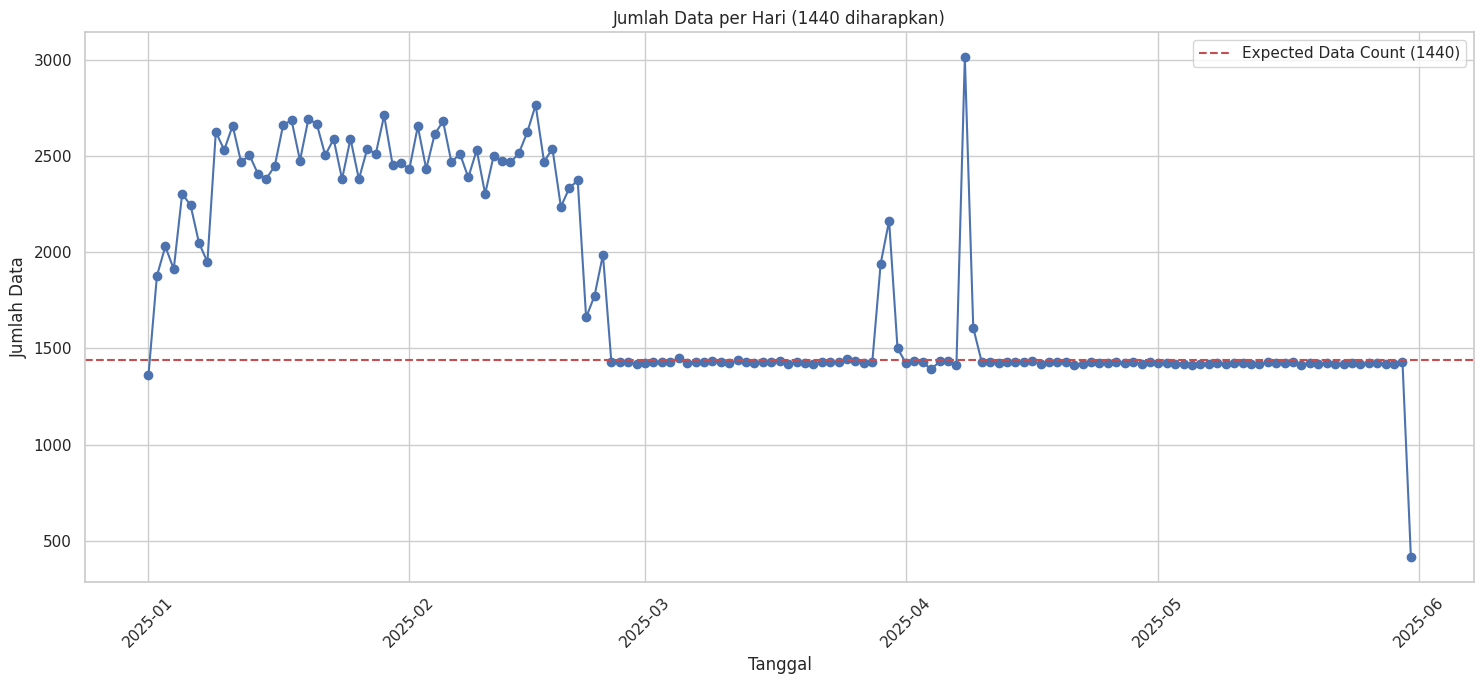

Hari dengan jumlah data yang kurang dari 1440:
           date  count
0    2025-01-01   1363
1    2025-01-02   1877
2    2025-01-03   2030
3    2025-01-04   1912
4    2025-01-05   2303
..          ...    ...
146  2025-05-27   1427
147  2025-05-28   1421
148  2025-05-29   1421
149  2025-05-30   1432
150  2025-05-31    418

[151 rows x 2 columns]


In [9]:
# Mengelompokkan data berdasarkan hari
cuaca1['date'] = cuaca1['timestamp'].dt.date
data_per_day = cuaca1.groupby('date').size().reset_index(name='count')

# Visualisasi jumlah data per hari
plt.figure(figsize=(15, 7))
plt.plot(data_per_day['date'], data_per_day['count'], marker='o', linestyle='-')
plt.axhline(y=1440, color='r', linestyle='--', label='Expected Data Count (1440)')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Data')
plt.title('Jumlah Data per Hari (1440 diharapkan)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Menampilkan hari-hari yang tidak memenuhi 1440 data
days_with_missing_data = data_per_day[data_per_day['count'] != 1440]
print("Hari dengan jumlah data yang kurang dari 1440:")
print(days_with_missing_data)

In [10]:
cuaca1.dtypes

dew                                 float64
humidity                            float64
pressure                            float64
temperature                         float64
timestamp      datetime64[ns, Asia/Jakarta]
volt                                float64
rainfall                            float64
rainrate                            float64
date                                 object
dtype: object

In [11]:
cuaca2.dtypes

dew                                 float64
humidity                            float64
pressure                            float64
rainfall                            float64
rainrate                            float64
temperature                         float64
timestamp      datetime64[ns, Asia/Jakarta]
volt                                float64
dtype: object

In [12]:
cuaca1.head(10)

,dew,humidity,pressure,temperature,timestamp,volt,rainfall,rainrate,date
1735689647,24.57,100.0,1009.21,24.57,2025-01-01 07:00:47+07:00,4.14,NaN,NaN,2025-01-01
1735689827,24.63,100.0,1009.26,24.63,2025-01-01 07:03:47+07:00,4.12,NaN,NaN,2025-01-01
1735689887,24.68,100.0,1009.27,24.68,2025-01-01 07:04:47+07:00,4.13,NaN,NaN,2025-01-01
1735689947,24.71,100.0,1009.29,24.71,2025-01-01 07:05:47+07:00,4.13,NaN,NaN,2025-01-01
1735690007,24.72,100.0,1009.34,24.72,2025-01-01 07:06:47+07:00,4.12,NaN,NaN,2025-01-01
1735690067,24.76,100.0,1009.33,24.76,2025-01-01 07:07:47+07:00,4.13,NaN,NaN,2025-01-01
1735690127,24.75,100.0,1009.35,24.75,2025-01-01 07:08:47+07:00,4.15,NaN,NaN,2025-01-01
1735690187,24.77,100.0,1009.36,24.77,2025-01-01 07:09:47+07:00,4.16,NaN,NaN,2025-01-01
1735690247,24.78,100.0,1009.38,24.78,2025-01-01 07:10:47+07:00,4.13,NaN,NaN,2025-01-01
1735690307,24.82,100.0,1009.43,24.82,2025-01-01 07:11:47+07:00,4.13,NaN,NaN,2025-01-01


In [13]:
datacuaca = cuaca1
datacuaca2 = cuaca2

Visualisasi missing values untuk datacuaca:


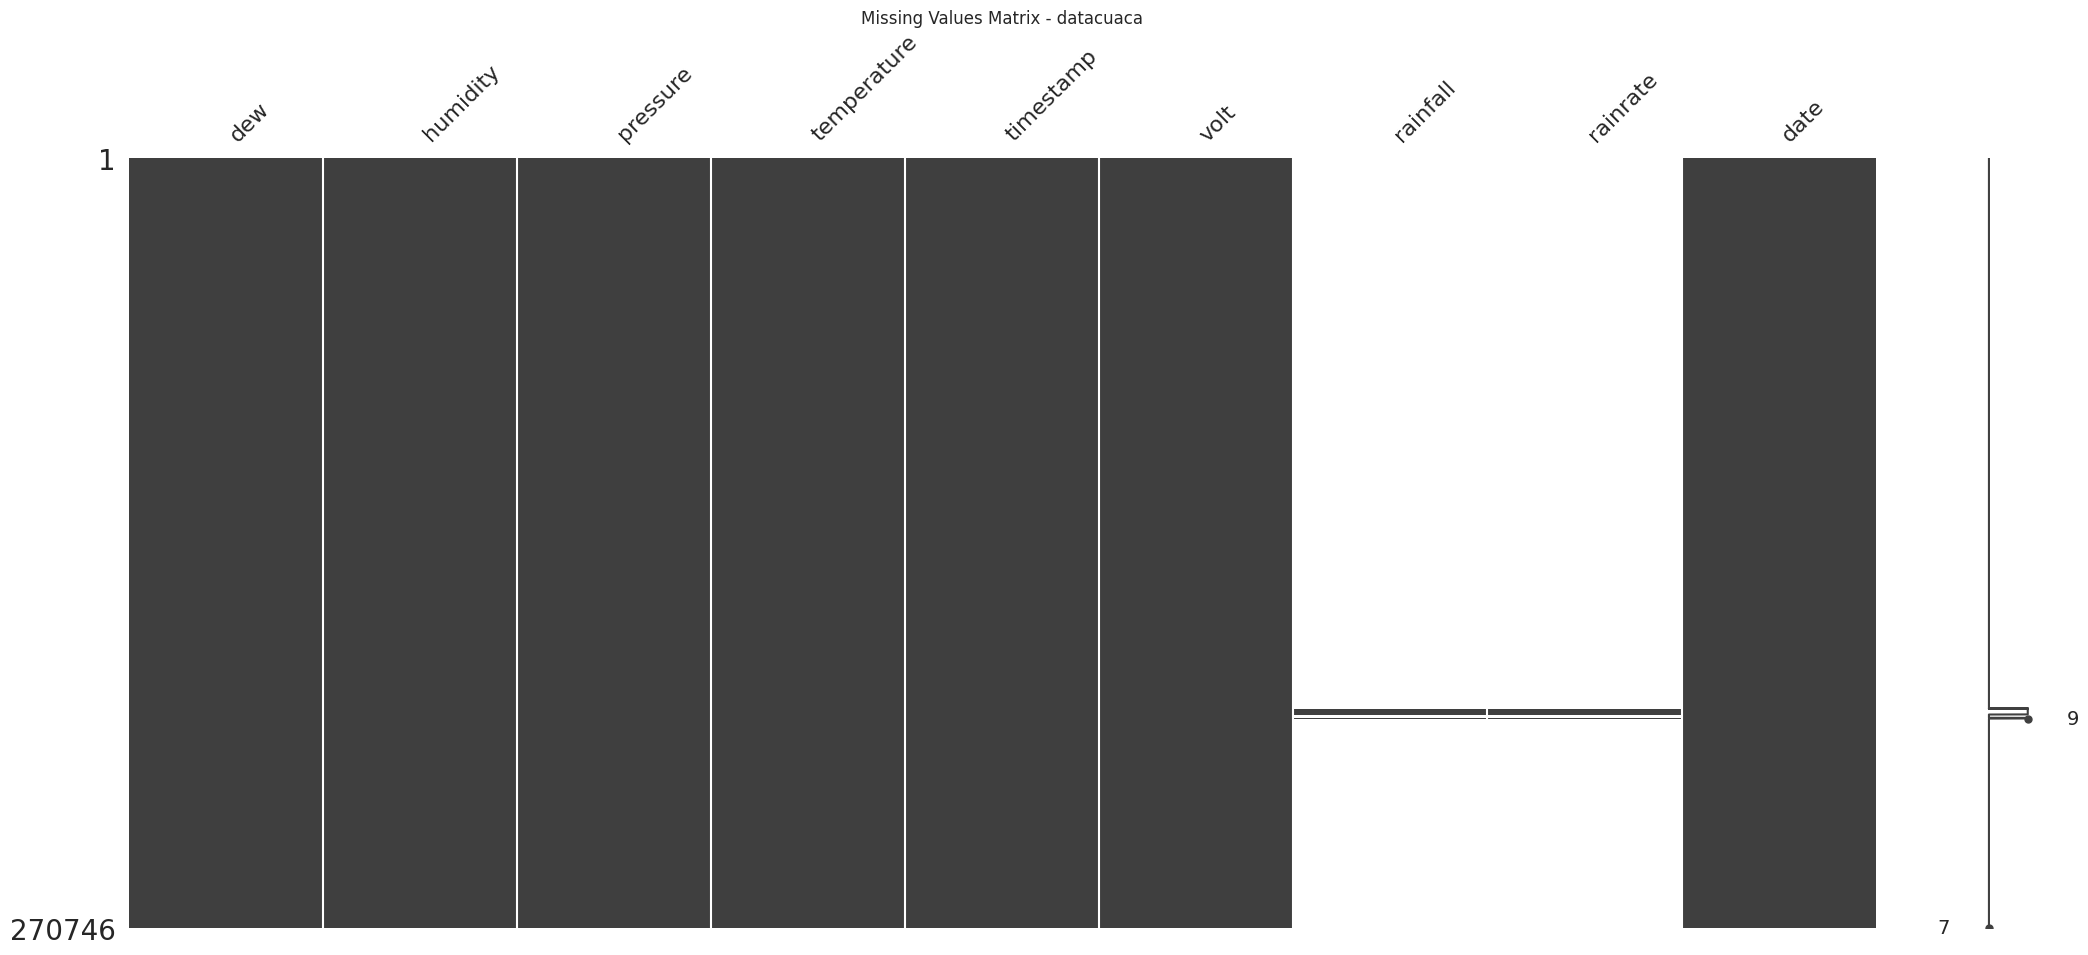

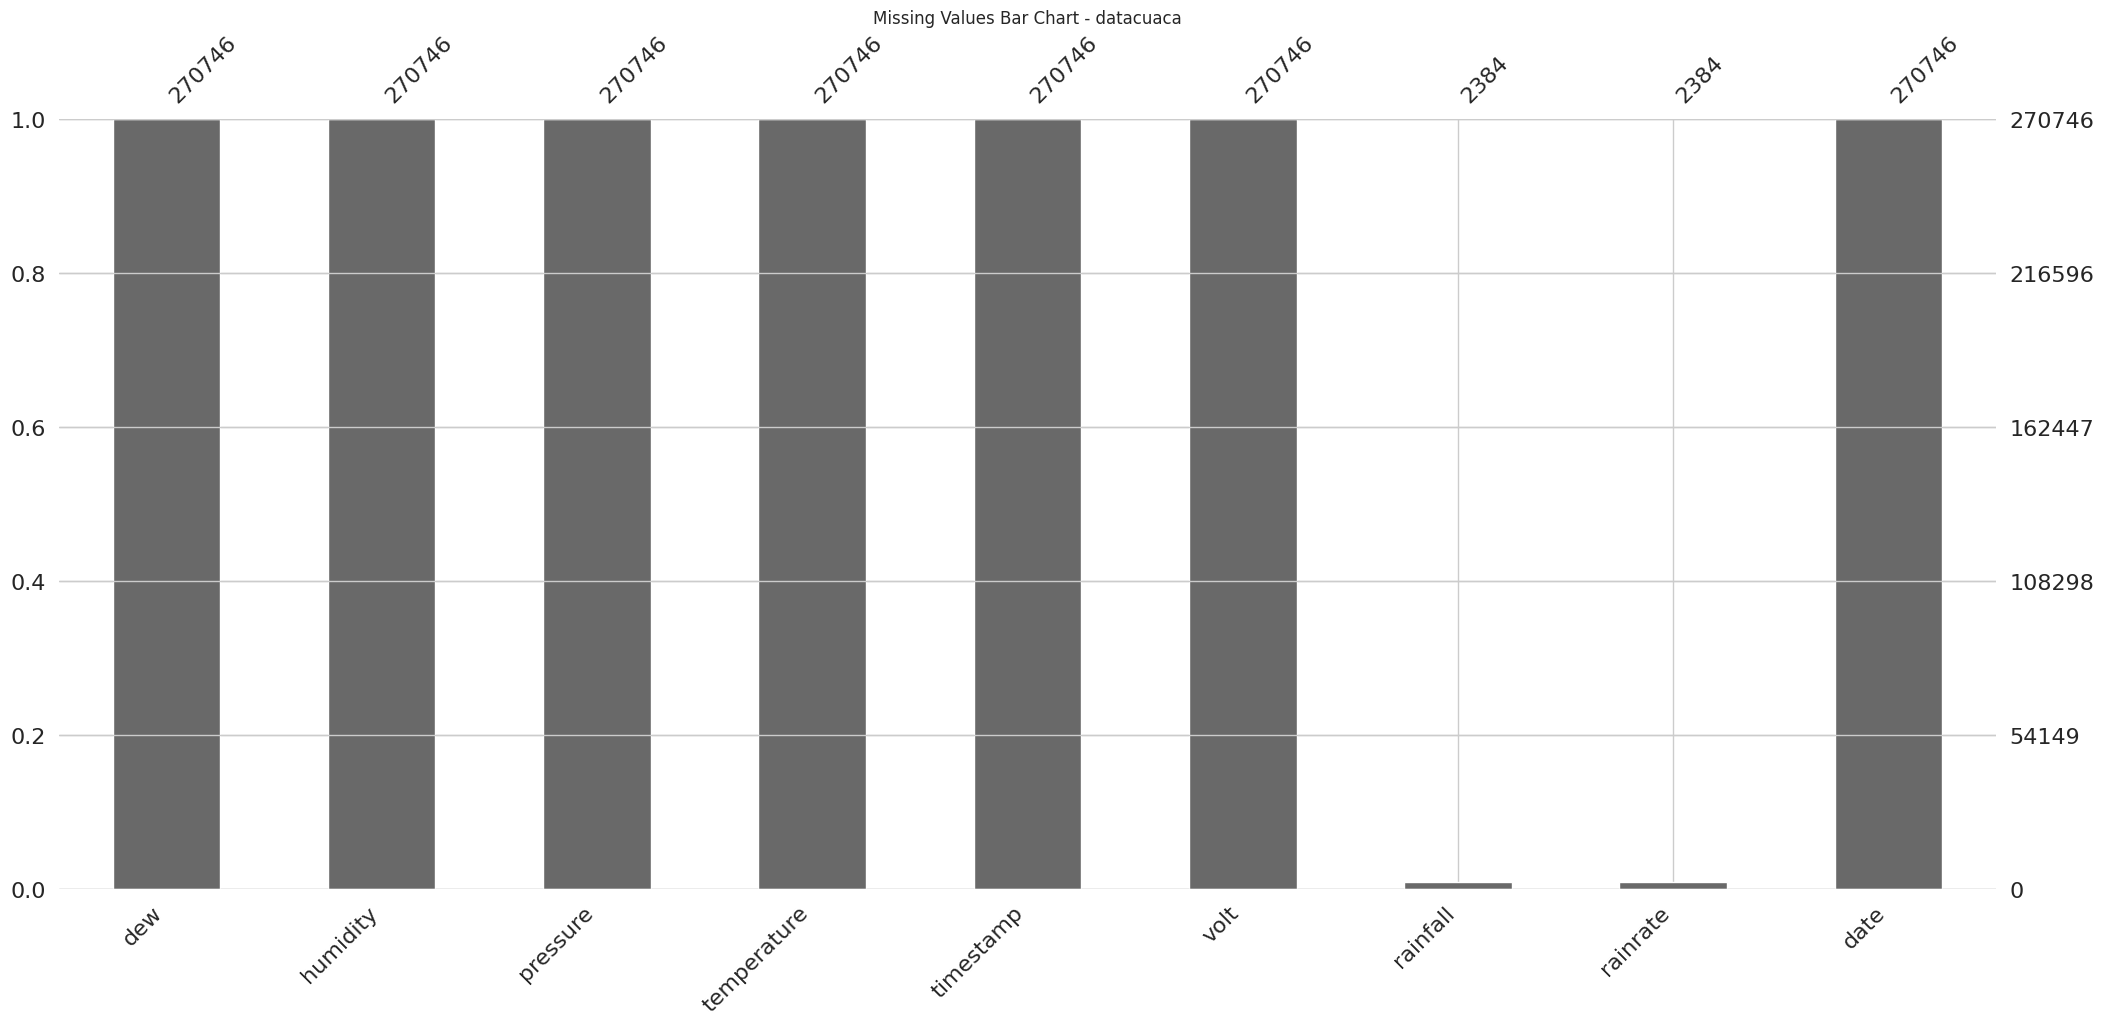

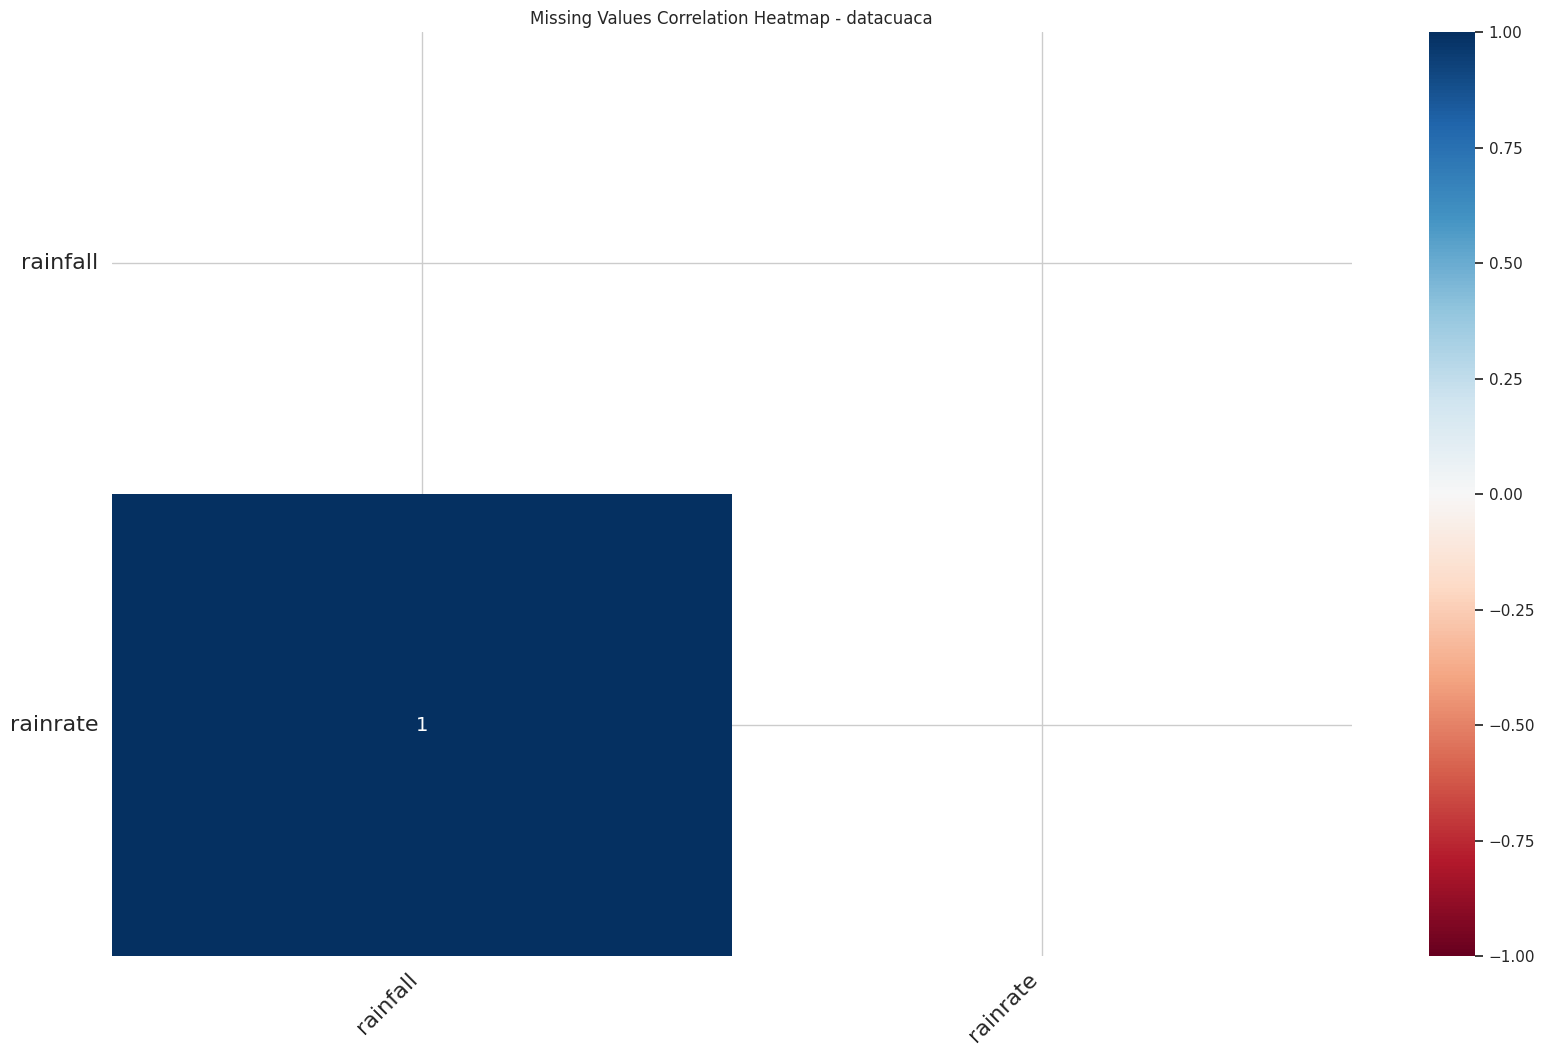

Visualisasi missing values untuk datacuaca2:


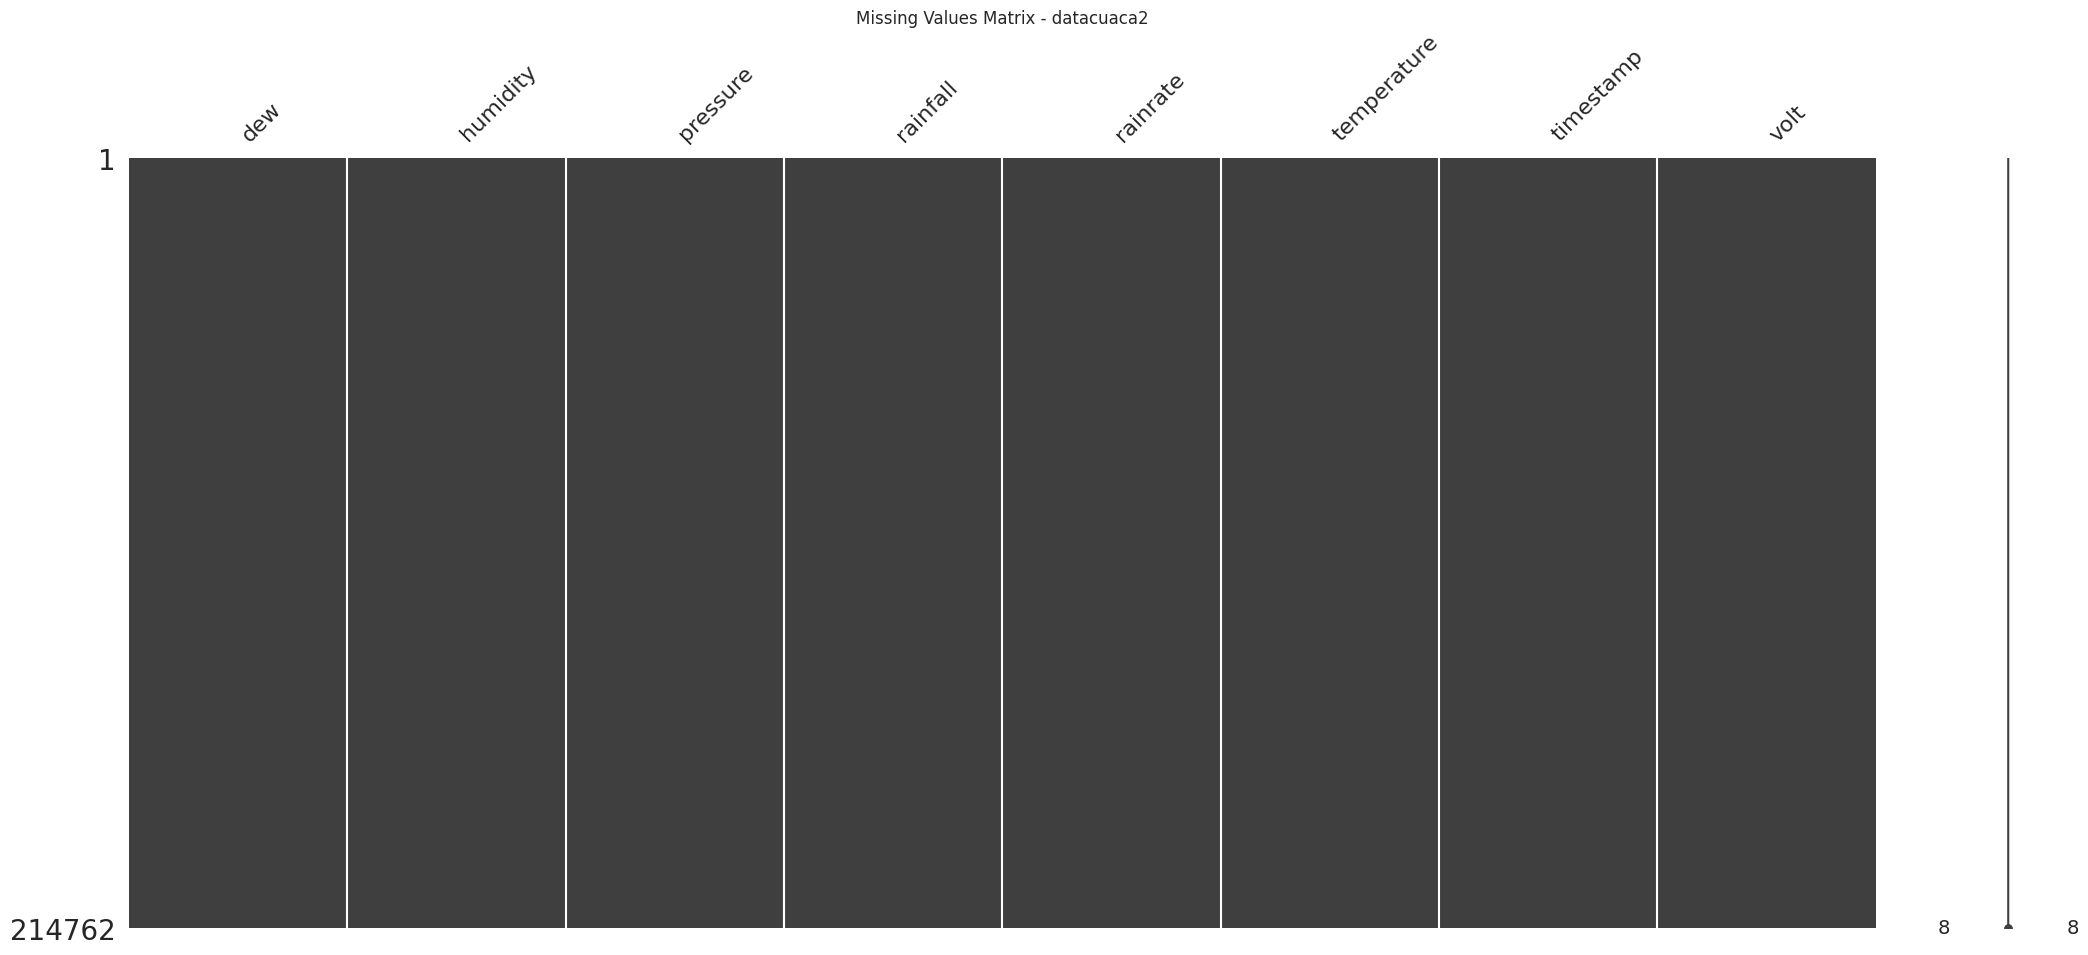

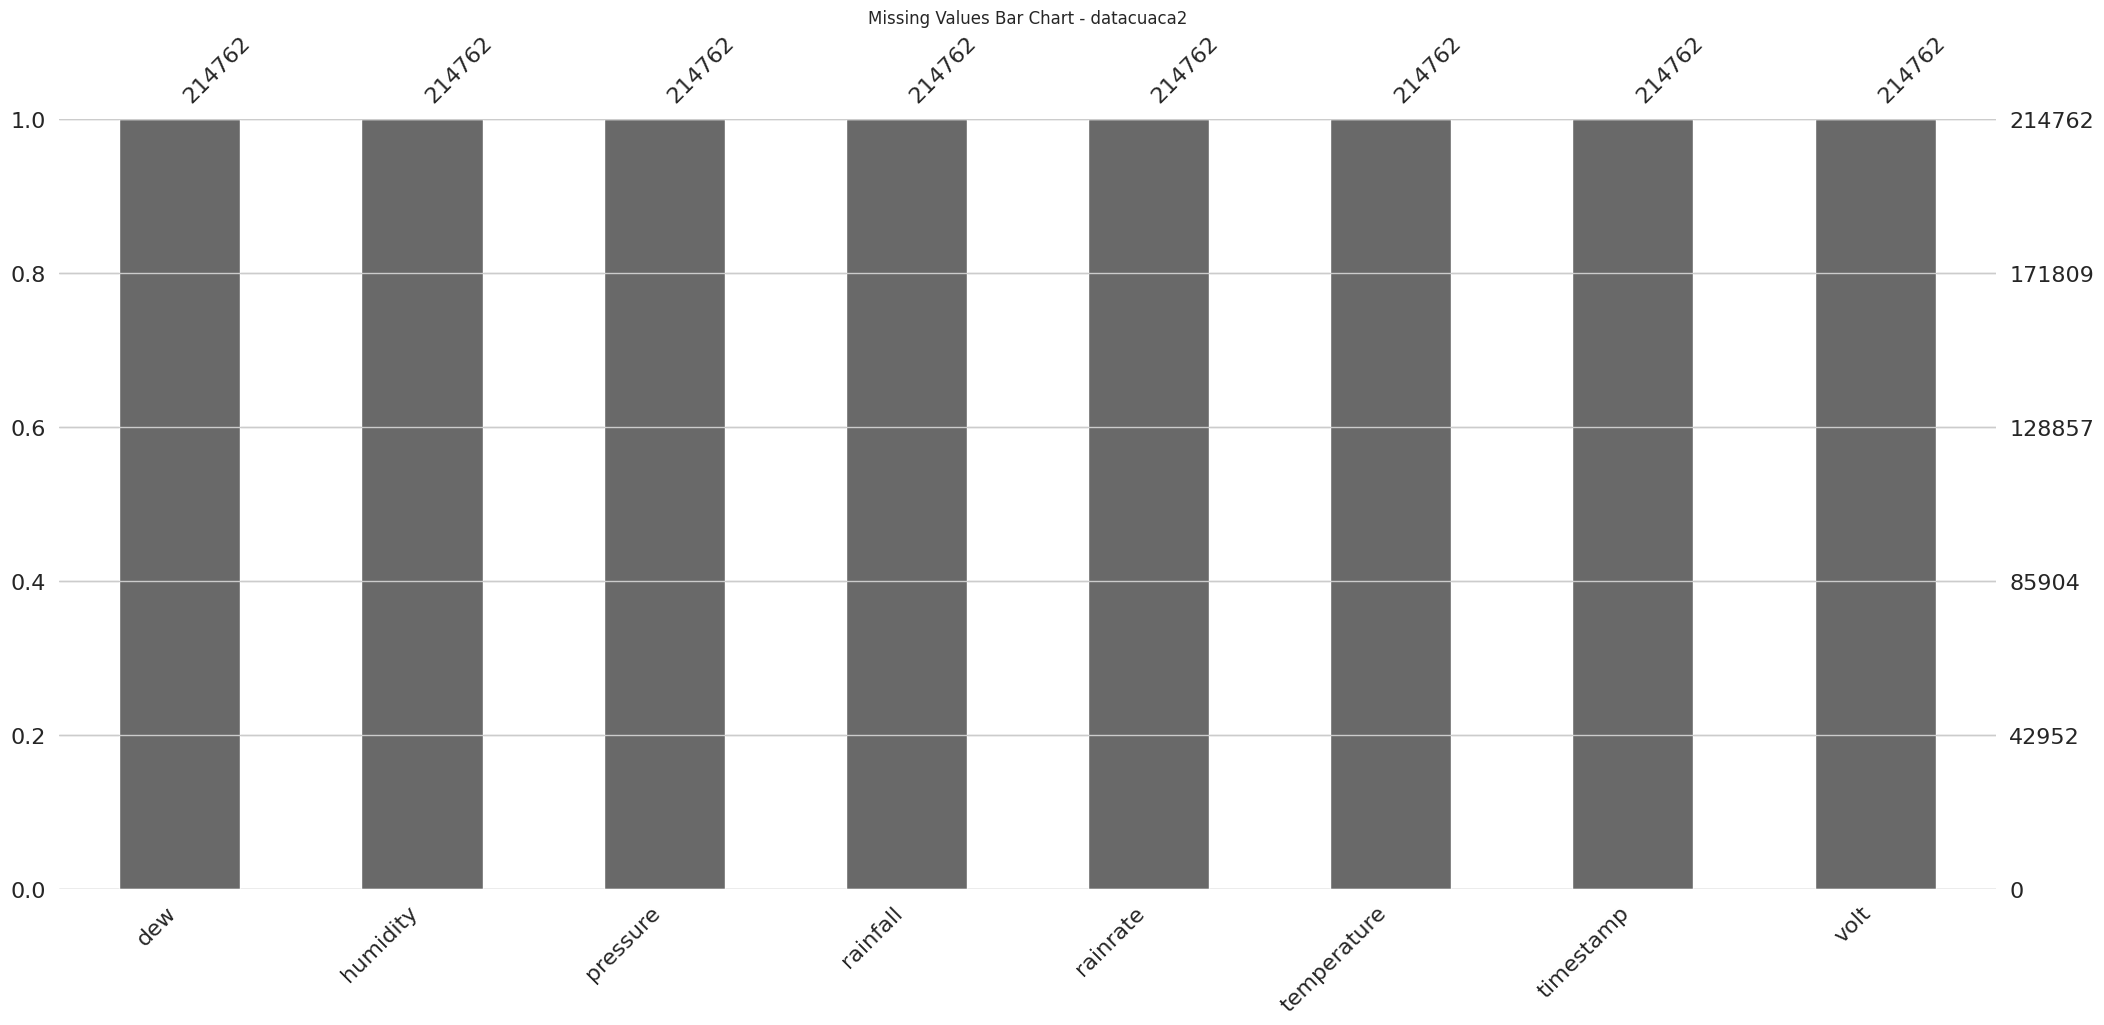

/root/venv/lib/python3.11/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/root/venv/lib/python3.11/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


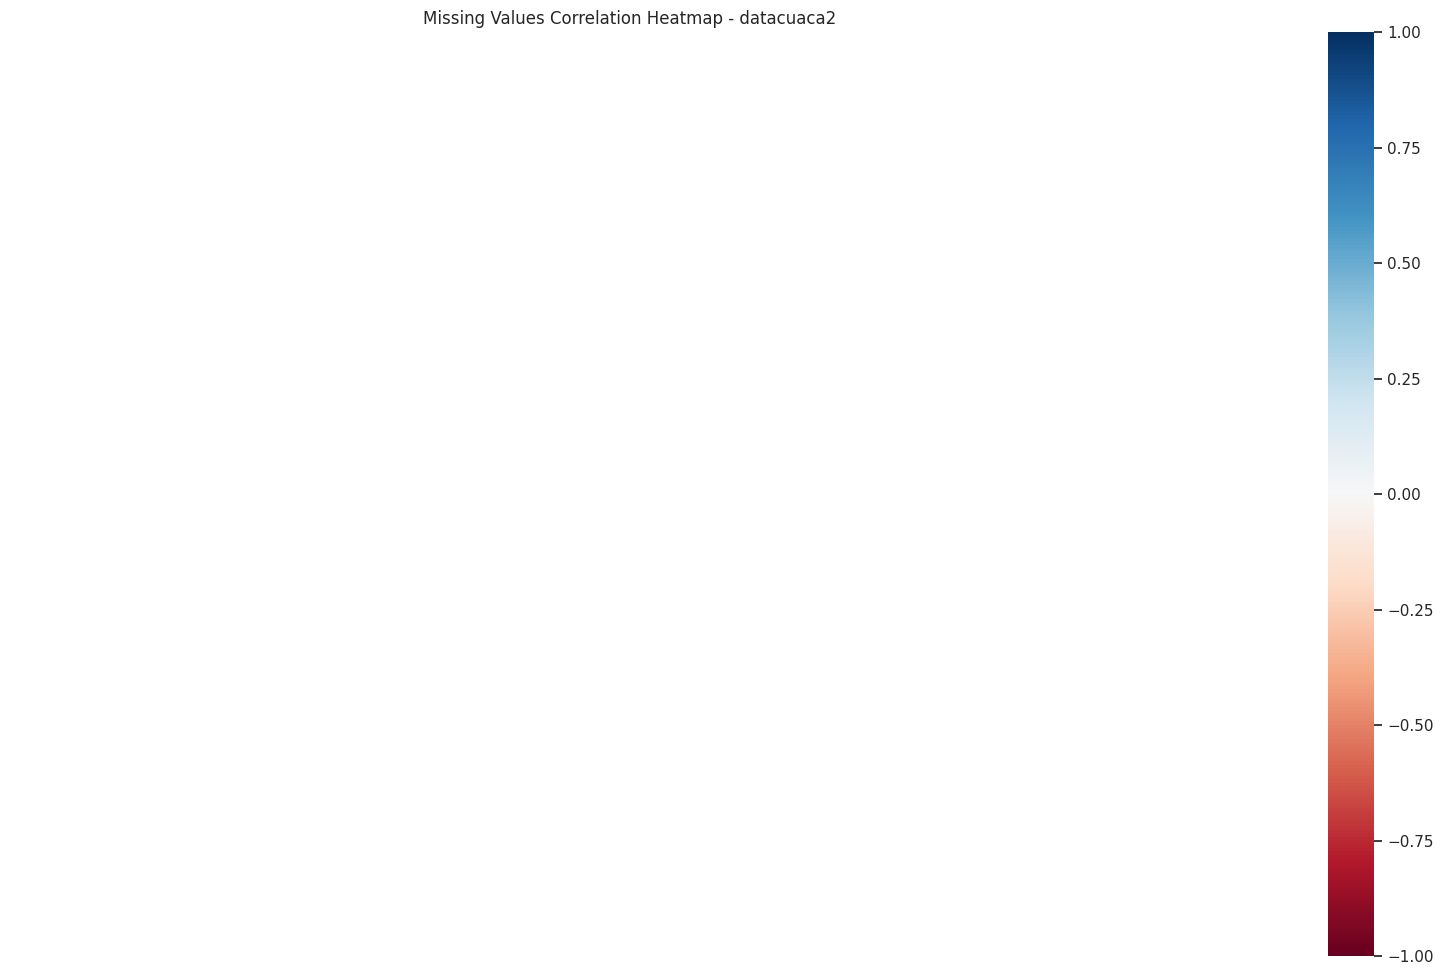

Ringkasan missing values untuk datacuaca:
dew                 0
humidity            0
pressure            0
temperature         0
timestamp           0
volt                0
rainfall       268362
rainrate       268362
date                0
dtype: int64

Ringkasan missing values untuk datacuaca2:
dew            0
humidity       0
pressure       0
rainfall       0
rainrate       0
temperature    0
timestamp      0
volt           0
dtype: int64


In [14]:
# Visualisasi missing values untuk datacuaca
print("Visualisasi missing values untuk datacuaca:")
msno.matrix(datacuaca)
plt.title("Missing Values Matrix - datacuaca")
plt.show()

msno.bar(datacuaca)
plt.title("Missing Values Bar Chart - datacuaca")
plt.show()

msno.heatmap(datacuaca)
plt.title("Missing Values Correlation Heatmap - datacuaca")
plt.show()

# Visualisasi missing values untuk datacuaca2
print("Visualisasi missing values untuk datacuaca2:")
msno.matrix(datacuaca2)
plt.title("Missing Values Matrix - datacuaca2")
plt.show()

msno.bar(datacuaca2)
plt.title("Missing Values Bar Chart - datacuaca2")
plt.show()

msno.heatmap(datacuaca2)
plt.title("Missing Values Correlation Heatmap - datacuaca2")
plt.show()

# Menampilkan ringkasan missing values
print("Ringkasan missing values untuk datacuaca:")
print(datacuaca.isnull().sum())

print("\nRingkasan missing values untuk datacuaca2:")
print(datacuaca2.isnull().sum())

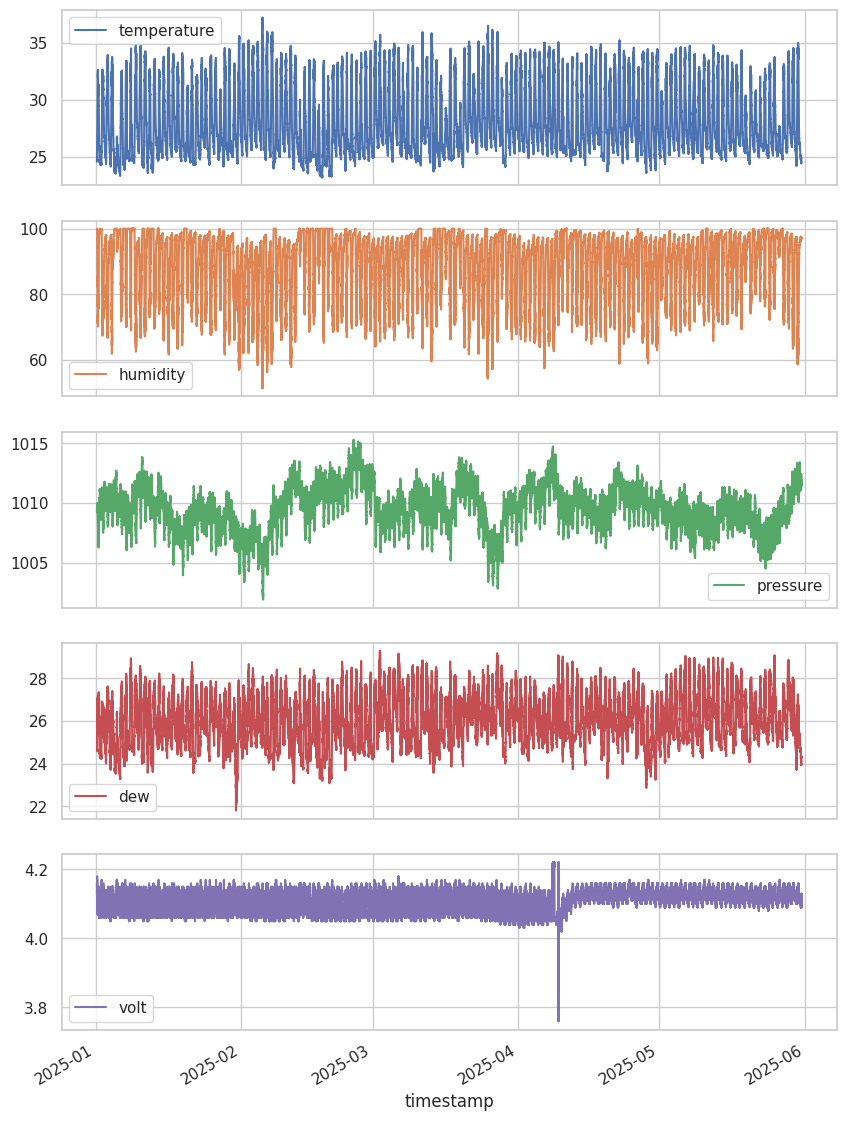

In [15]:
datacuaca.plot(
    y=[
    'temperature', 
    'humidity', 
    'pressure', 
    'dew',
    #'rainrate',
    #'rainfall',
    'volt'
    ],
    x='timestamp',
    subplots=True, figsize=(10, 15))
plt.show()

In [16]:
# Mengubah kolom 'timestamp' menjadi datetime
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Mengurutkan data berdasarkan 'timestamp'
datacuaca = datacuaca.sort_values(by='timestamp')

# Menambahkan kolom 'hour', 'minute', 'day', 'month', dan 'year' dari 'timestamp'
datacuaca['hour'] = datacuaca['timestamp'].dt.hour
datacuaca['minute'] = datacuaca['timestamp'].dt.minute
datacuaca['day'] = datacuaca['timestamp'].dt.day
datacuaca['week'] = datacuaca['timestamp'].dt.isocalendar().week
datacuaca['month'] = datacuaca['timestamp'].dt.month
datacuaca['year'] = datacuaca['timestamp'].dt.year

In [17]:
datacuaca['hour'] = datacuaca['timestamp'].dt.floor('h')  # Membulatkan ke jam terdekat

In [18]:
# Mengubah kolom 'timestamp' menjadi datetime
datacuaca2['timestamp'] = pd.to_datetime(datacuaca2['timestamp'])

# Mengurutkan data berdasarkan 'timestamp'
datacuaca2 = datacuaca2.sort_values(by='timestamp')

# Menambahkan kolom 'hour', 'minute', 'day', 'month', dan 'year' dari 'timestamp'
datacuaca2['hour'] = datacuaca2['timestamp'].dt.hour
datacuaca2['minute'] = datacuaca2['timestamp'].dt.minute
datacuaca2['day'] = datacuaca2['timestamp'].dt.day
datacuaca2['week'] = datacuaca2['timestamp'].dt.isocalendar().week
datacuaca2['month'] = datacuaca2['timestamp'].dt.month
datacuaca2['year'] = datacuaca2['timestamp'].dt.year

In [19]:
datacuaca2['hour'] = datacuaca2['timestamp'].dt.floor('h')  # Membulatkan ke jam terdekat

In [20]:
datacuaca.tail(10)

,dew,humidity,pressure,temperature,timestamp,volt,rainfall,rainrate,date,hour,minute,day,week,month,year
1748649008,24.31731,97.27,1011.83,24.78,2025-05-31 06:50:08+07:00,4.11,NaN,NaN,2025-05-31,2025-05-31 06:00:00+07:00,50,31,22,5,2025
1748649068,24.33209,97.24,1011.86,24.80,2025-05-31 06:51:08+07:00,4.13,NaN,NaN,2025-05-31,2025-05-31 06:00:00+07:00,51,31,22,5,2025
1748649128,24.33691,97.21,1011.85,24.81,2025-05-31 06:52:08+07:00,4.13,NaN,NaN,2025-05-31,2025-05-31 06:00:00+07:00,52,31,22,5,2025
1748649188,24.30015,97.17,1011.82,24.78,2025-05-31 06:53:08+07:00,4.13,NaN,NaN,2025-05-31,2025-05-31 06:00:00+07:00,53,31,22,5,2025
1748649248,24.32282,97.07,1011.85,24.82,2025-05-31 06:54:08+07:00,4.12,NaN,NaN,2025-05-31,2025-05-31 06:00:00+07:00,54,31,22,5,2025
1748649308,24.33723,96.98,1011.85,24.85,2025-05-31 06:55:08+07:00,4.12,NaN,NaN,2025-05-31,2025-05-31 06:00:00+07:00,55,31,22,5,2025
1748649368,24.28017,96.88,1011.87,24.81,2025-05-31 06:56:08+07:00,4.11,NaN,NaN,2025-05-31,2025-05-31 06:00:00+07:00,56,31,22,5,2025
1748649428,24.30278,96.78,1011.88,24.85,2025-05-31 06:57:08+07:00,4.10,NaN,NaN,2025-05-31,2025-05-31 06:00:00+07:00,57,31,22,5,2025
1748649488,24.31925,96.76,1011.88,24.87,2025-05-31 06:58:08+07:00,4.12,NaN,NaN,2025-05-31,2025-05-31 06:00:00+07:00,58,31,22,5,2025
1748649549,24.32058,96.71,1011.95,24.88,2025-05-31 06:59:09+07:00,4.12,NaN,NaN,2025-05-31,2025-05-31 06:00:00+07:00,59,31,22,5,2025


In [21]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

2025-12-02 02:20:39.295731: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-02 02:20:39.324648: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-12-02 02:20:39.324734: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-12-02 02:20:39.325540: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-12-02 02:20:39.330217: I tensorflow/core/platform/cpu_feature_guar

In [22]:
# Mengelompokkan data berdasarkan jam dan menghitung rata-rata temperature
datacuaca_hourly = datacuaca.groupby('hour')['temperature'].mean().reset_index()

# Pastikan data sudah terurut berdasarkan waktu
datacuaca_hourly = datacuaca_hourly.sort_values(by='hour').reset_index(drop=True)

# Menyiapkan data untuk model
def create_sequences(data, lookback, forecast_horizon):
    X, y = [], []
    for i in range(len(data) - lookback - forecast_horizon):
        X.append(data[i:i + lookback])
        y.append(data[i + lookback:i + lookback + forecast_horizon])
    return np.array(X), np.array(y)

# Normalisasi data
scaler = MinMaxScaler()
temperature_scaled = scaler.fit_transform(datacuaca_hourly[['temperature']])

In [23]:
# Membuat dataset
lookback = 6  # Menggunakan data 6 jam sebelumnya
forecast_horizon = 6  # Memprediksi 6 jam ke depan
X, y = create_sequences(temperature_scaled, lookback, forecast_horizon)

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membangun model TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, activation='relu', input_shape=(lookback, 1), return_sequences=True),
    tf.keras.layers.LSTM(32, activation='relu'),
    tf.keras.layers.Dense(forecast_horizon)
])

# Mengatur optimizer dengan learning rate khusus
optimizer = Adam(learning_rate=0.001)  # Ubah nilai learning rate sesuai kebutuhan
model.compile(optimizer=optimizer, loss='mse')

In [24]:
# Melatih model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

# Membuat prediksi
predictions = model.predict(X_test)

# Membalikkan normalisasi untuk interpretasi hasil
# Reshape predictions dan y_test agar menjadi 2D sebelum inverse_transform
predictions_rescaled = scaler.inverse_transform(predictions.reshape(-1, 1)).reshape(predictions.shape)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(y_test.shape)

Epoch 1/100
45/45 [==============================] - 2s 12ms/step - loss: 0.1198 - val_loss: 0.0622
Epoch 2/100
45/45 [==============================] - 0s 6ms/step - loss: 0.0525 - val_loss: 0.0466
Epoch 3/100
45/45 [==============================] - 0s 6ms/step - loss: 0.0435 - val_loss: 0.0378
Epoch 4/100
45/45 [==============================] - 0s 6ms/step - loss: 0.0348 - val_loss: 0.0274
Epoch 5/100
45/45 [==============================] - 0s 5ms/step - loss: 0.0271 - val_loss: 0.0243
Epoch 6/100
45/45 [==============================] - 0s 6ms/step - loss: 0.0244 - val_loss: 0.0228
Epoch 7/100
45/45 [==============================] - 0s 6ms/step - loss: 0.0232 - val_loss: 0.0217
Epoch 8/100
45/45 [==============================] - 0s 5ms/step - loss: 0.0224 - val_loss: 0.0207
Epoch 9/100
45/45 [==============================] - 0s 6ms/step - loss: 0.0218 - val_loss: 0.0210
Epoch 10/100
45/45 [==============================] - 0s 6ms/step - loss: 0.0224 - val_loss: 0.0195
Epoch 11

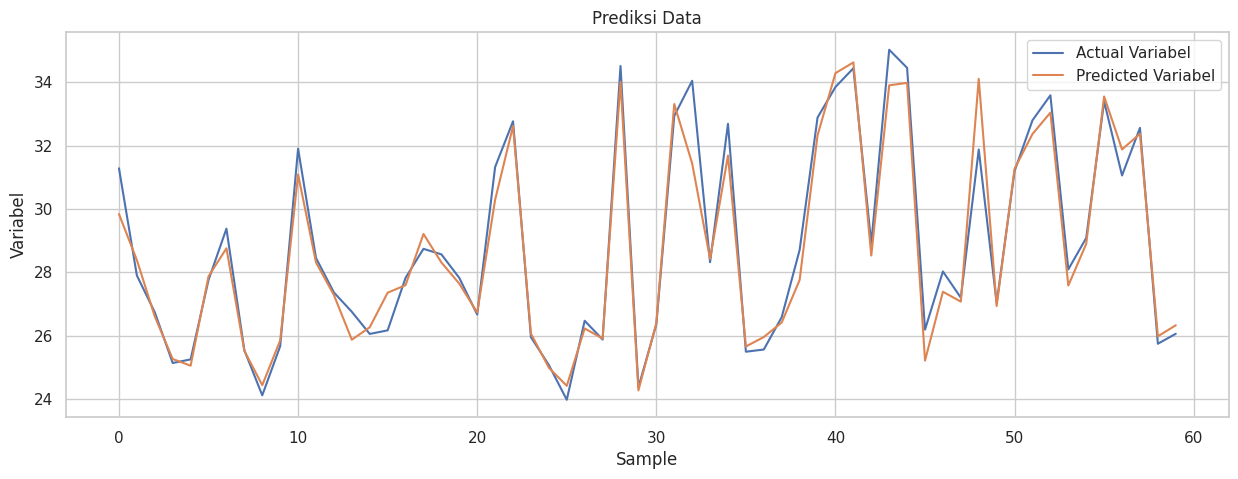

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 64)             16896     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 6)                 198       
                                                                 
Total params: 29510 (115.27 KB)
Trainable params: 29510 (115.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
# Menampilkan hasil prediksi vs data aktual untuk langkah pertama (step 0 dari 6 jam ke depan)
plt.figure(figsize=(15, 5))
plt.plot(y_test_rescaled[:60, 0], label='Actual Variabel')
plt.plot(predictions_rescaled[:60, 0], label='Predicted Variabel')
plt.legend()
plt.title('Prediksi Data')
plt.xlabel('Sample')
plt.ylabel('Variabel')
plt.grid(True)
plt.show()
model.summary()

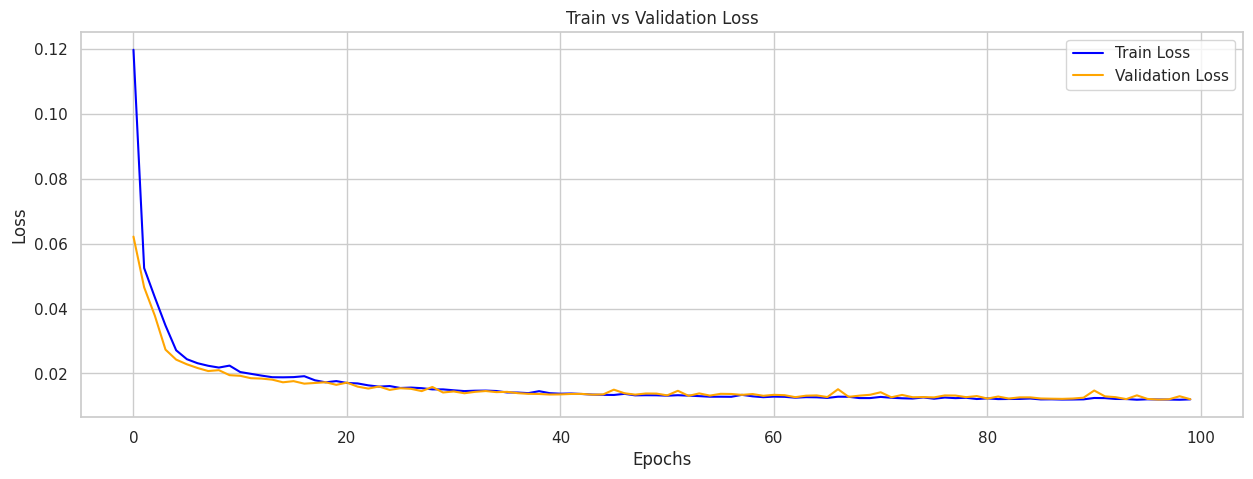

In [26]:
plt.figure(figsize=(15, 5))
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Train vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=672c3bf7-b636-46e8-b7c0-4f6feec29313' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>